In [318]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [319]:
from datasets import load_dataset


trainset_fr = load_dataset("amazon_reviews_multi", "fr",split="train")


trainset_en = load_dataset("amazon_reviews_multi", "en",split="train")

In [320]:
# Importation
import pandas as pd

In [321]:
#COnversion
train_fr=pd.DataFrame(trainset_fr)
train_en=pd.DataFrame(trainset_en)

In [322]:
train_fr.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,fr_0424335,product_fr_0297678,reviewer_fr_0961886,1,A déconseiller - Article n'a fonctionné qu'une...,Brumisateur à pompe,fr,beauty
1,fr_0452615,product_fr_0613288,reviewer_fr_0857499,1,Si vous voulez être déçu achetez le produit ! ...,Insatisfaisant,fr,baby_product
2,fr_0407673,product_fr_0571250,reviewer_fr_0383240,1,"Écran de mauvaise qualité, car il s'use en peu...",Ne recommande pas,fr,pc
3,fr_0579191,product_fr_0030168,reviewer_fr_0729693,1,Cet engin ne sert à rien les sons sont pourris...,A éviter!,fr,musical_instruments
4,fr_0931533,product_fr_0468261,reviewer_fr_0734066,1,Très beau produit mais la grue n'a pas fonctio...,Déçue,fr,toy


In [323]:
train_fr.shape

(200000, 8)

In [324]:
train_en.shape

(200000, 8)

In [325]:
df_fr=train_fr.copy()
df_en=train_en.copy()

In [326]:
# Exploration
df_fr.sample(5)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
108453,fr_0800930,product_fr_0356547,reviewer_fr_0366826,3,Pas tres fines mais dait son effet !!,Pas une grande grappa !!,fr,other
46716,fr_0956798,product_fr_0372552,reviewer_fr_0699231,2,Très belle bande dessinée retraçant la vie de ...,Livre magnifique mais livraison catastrophique !,fr,book
175595,fr_0336728,product_fr_0718199,reviewer_fr_0253042,5,Très bien. Livraison rapide. Pas cher. Après j...,Très bien,fr,toy
92860,fr_0512839,product_fr_0771947,reviewer_fr_0104271,3,Un peu déçu par ses ustensiles. Ils ne passent...,A revoir..,fr,home
115135,fr_0405917,product_fr_0924937,reviewer_fr_0638050,3,"la notice est en anglais seulement, bel appare...",probleme,fr,home_improvement


In [327]:
df_fr['stars'].value_counts()

1    40000
2    40000
3    40000
4    40000
5    40000
Name: stars, dtype: int64

In [374]:
# Process Extraction 2000 par avis et par note
def process_extract_en(star,n=2000):
  return df_en[df_en['stars']==star].sample(n)

def process_extract_fr(star,n=2000):
  return df_fr[df_fr['stars']==star].sample(n)

In [329]:
# Concatenation
"""
df_full_fr=pd.concat([process_extract_fr(i) for i in range(1,6)])
df_full_en=pd.concat([process_extract_en(i) for i in range(1,6)])
"""

#Autre methode
df_full_fr=df_fr.groupby('stars').sample(2000)
df_full_en=df_en.groupby('stars').sample(2000)

In [330]:
df_full=pd.concat([df_full_fr,df_full_en])

## Analyse Statistiques des données

In [331]:
df_full.shape

(20000, 8)

In [332]:
df_full.sample(5)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
47016,en_0743757,product_en_0351211,reviewer_en_0472886,2,If you are using this while driving highway sp...,Not for moderate to heavy use,en,automotive
99670,en_0563435,product_en_0495687,reviewer_en_0596018,3,Fairly thin and we wore through a single pair ...,Fairly thin and we wore through a single pair ...,en,apparel
45414,en_0308291,product_en_0333848,reviewer_en_0082767,2,"Not easy to get the food on the fork, super th...",Meh,en,baby_product
34504,en_0262716,product_en_0574518,reviewer_en_0673915,1,It said it was one-day delivery with amazon pr...,Never got the product,en,shoes
112913,en_0718453,product_en_0877224,reviewer_en_0611754,3,This cookbook is okay. I tend to use it more f...,Good for cooking methods-recipes just okay.,en,digital_ebook_purchase


In [333]:
df_full['stars'].value_counts()

1    4000
2    4000
3    4000
4    4000
5    4000
Name: stars, dtype: int64

<Axes: ylabel='stars'>

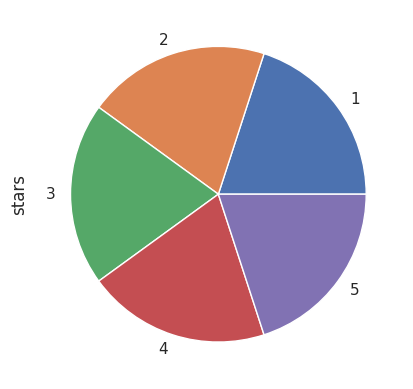

In [334]:
df_full['stars'].value_counts().plot.pie()

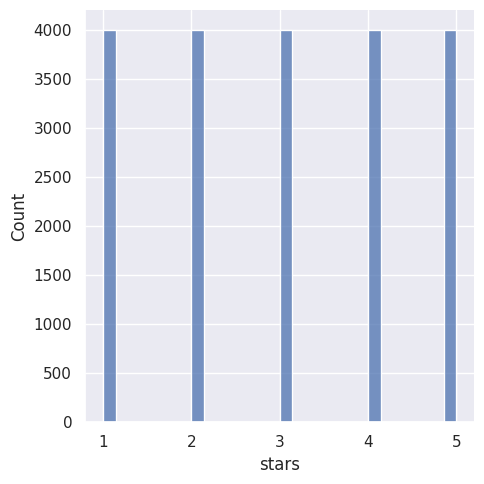

In [335]:
# Visualisation de la distrubition

import seaborn as sns

sns.displot(data=df_full,x="stars")

In [336]:
df_full.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
21728,fr_0505605,product_fr_0219266,reviewer_fr_0182881,1,arrivé en mille morceaux,arrivé en mille morceaux,fr,electronics
23813,fr_0286427,product_fr_0959724,reviewer_fr_0505691,1,Pas pratique en fait. Harnais qui remonte quan...,Decu,fr,wireless
3899,fr_0371913,product_fr_0845021,reviewer_fr_0298304,1,Elle est complètement exploser mon chien à tir...,Ne tient pas ses promesses,fr,pet_products
15468,fr_0846786,product_fr_0672747,reviewer_fr_0809062,1,Je n'ai jamais reçu ce produit!,Sac jamais arrivé!,fr,sports
1043,fr_0785590,product_fr_0108449,reviewer_fr_0481815,1,Articles jalais reçus malgres plusieurs relanc...,Non reçu,fr,drugstore


<Axes: ylabel='language'>

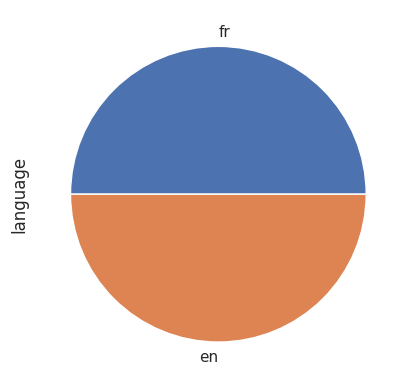

In [337]:
# Repartion language
df_full['language'].value_counts().plot.pie()

In [338]:
df_full['review_body']

21728                              arrivé en mille morceaux
23813     Pas pratique en fait. Harnais qui remonte quan...
3899      Elle est complètement exploser mon chien à tir...
15468                       Je n'ai jamais reçu ce produit!
1043      Articles jalais reçus malgres plusieurs relanc...
                                ...                        
193778    Very easy to use. I churned out 4lbs of chocol...
187453    My 2 and a half year out was getting out of hi...
174141    Does the job. Appear to be well made with cabl...
178456    I love this mattress cover. It's so soft and f...
170585    I needed an affordable dual charger for my Son...
Name: review_body, Length: 20000, dtype: object

In [339]:
# Nettoyage du texte
!pip install nltk
!pip install simplemma


import re
import nltk
import simplemma
from nltk.stem import PorterStemmer

nltk.download('stopwords')
nltk.download('punkt')
lst_stopwords_fr = nltk.corpus.stopwords.words("french")
lst_stopwords_en = nltk.corpus.stopwords.words("english")
ps = PorterStemmer()


def remove_emoji(text):
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
            u"\U00002700-\U000027BF"  # Dingbats
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)



def remove_punctuation_emojis_numbers(text):
    # Supprimer la ponctuation
    text_no_punct = re.sub(r'[^\w\s]','',text)
    
    # Supprimer les emojis
    text_no_emojis = remove_emoji(text_no_punct)
    
    # Supprimer les nombres
    text_no_numbers = re.sub(r'\d+', '', text_no_emojis)
    
    
    return text_no_numbers



lst_stopwords = nltk.corpus.stopwords.words("french")


def preprocess(text, lang):

    if lang == 'fr':
        words = []
        text_pro = remove_punctuation_emojis_numbers(text)
        w = nltk.tokenize.word_tokenize(text_pro, language='french',preserve_line=False)
        words.extend(w)
        words = [simplemma.lemmatize(w.lower(), lang='fr') for w in words if w not in lst_stopwords]
    
        text = " ".join(words)

    elif lang=='en':

        words = []
        text_pro = remove_punctuation_emojis_numbers(text)
        w = nltk.tokenize.word_tokenize(text_pro, language='english',preserve_line=False)
        words.extend(w)
        words = [ps.stem(w.lower()) for w in words if w not in lst_stopwords]
    
        text = " ".join(words)



    return text




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#Process

def process_data(text,lang):
  return preprocess(text,'fr') if lang=='fr' else preprocess(text,'en')

#df1.head()

In [ ]:
import numpy as np
df_full['text_clean']=np.vectorize(process_data)(df_full['review_body'],df_full['language'])

In [ ]:
df_full.sample()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,text_clean
123630,fr_0052557,product_fr_0106385,reviewer_fr_0951458,4,J'ai failli renvoyer la commande car il était ...,Bon prix,fr,electronics,jai failli renvoyer commande car impossible co...


In [341]:
df_full_fr
df_full_en

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
4060,en_0697707,product_en_0562141,reviewer_en_0400400,1,The 4 had a hole in it. Was down before the pa...,Holes in Balloons,en,kitchen
30727,en_0567431,product_en_0912366,reviewer_en_0147648,1,It doesn’t work without being on the charger a...,Do not buy this it doesn’t work at all,en,wireless
37863,en_0329371,product_en_0963114,reviewer_en_0856996,1,Very disappointing. More dirt and dust on the ...,Not worth the price.,en,home
490,en_0204359,product_en_0849062,reviewer_en_0382604,1,This is so stupid I thought it was something c...,Not what I expected!,en,other
19866,en_0809352,product_en_0534589,reviewer_en_0295524,1,I was sent a blue calculator after buying a wh...,Incorrect shipping.,en,office_product
...,...,...,...,...,...,...,...,...
193778,en_0349941,product_en_0849744,reviewer_en_0949700,5,Very easy to use. I churned out 4lbs of chocol...,Perfect Harry Potter chocolate frog,en,kitchen
187453,en_0258034,product_en_0488164,reviewer_en_0122275,5,My 2 and a half year out was getting out of hi...,Cozy,en,home
174141,en_0856138,product_en_0490965,reviewer_en_0165483,5,Does the job. Appear to be well made with cabl...,It works great it simulates everything that's ...,en,pc
178456,en_0661821,product_en_0757166,reviewer_en_0547892,5,I love this mattress cover. It's so soft and f...,Nice padding...,en,furniture


In [347]:
def visualise_by_stars(star,cols,stop_word_fr=[],stop_word_en=[]):
  fig, (ax1,ax2)=plt.subplots(1,2,figsize=[20,5])
  w1=WordCloud(background_color='white',width=600,height=400,stopwords=set(stop_word_fr)).generate(" ".join(df_full_fr[df_full_fr['stars']==star][cols]))
  w2=WordCloud(background_color='white',width=600,height=400,stopwords=set(stop_word_en)).generate(" ".join(df_full_en[df_full_en['stars']==star][cols]))
  ax1.imshow(w1)
  ax2.imshow(w2)

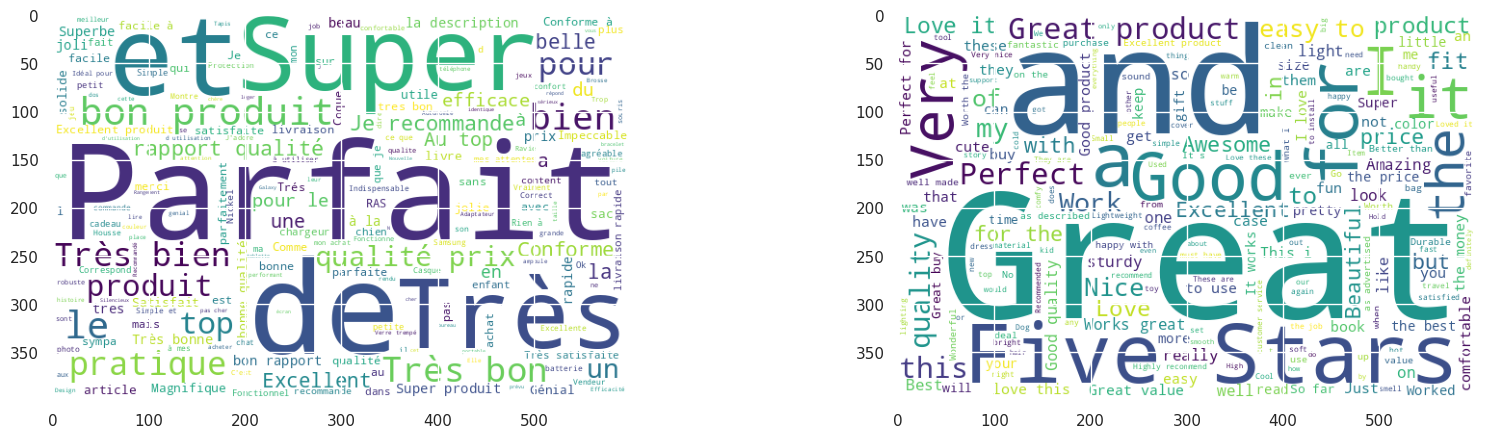

In [348]:
visualise_by_stars(5,'review_title')

In [359]:
def assign(val):
  if val in [1,2]:
    return 'insatisfait'
  elif val==3:
    return 'mitige'
  elif val in [4,5]:
    return 'satisfait'

In [360]:
df_full_fr['niveau']=df_full_fr['stars'].apply(lambda x:assign(x))
df_full_en['niveau']=df_full_en['stars'].apply(lambda x:assign(x))

In [361]:
df_full=pd.concat([df_full_fr,df_full_en])

In [375]:
df_full=df_full[['stars','review_body','review_title','niveau','language']]

In [363]:
df_full.head()

,stars,review_body,review_title,niveau,language
21728,1,arrivé en mille morceaux,arrivé en mille morceaux,insatisfait,fr
23813,1,Pas pratique en fait. Harnais qui remonte quan...,Decu,insatisfait,fr
3899,1,Elle est complètement exploser mon chien à tir...,Ne tient pas ses promesses,insatisfait,fr
15468,1,Je n'ai jamais reçu ce produit!,Sac jamais arrivé!,insatisfait,fr
1043,1,Articles jalais reçus malgres plusieurs relanc...,Non reçu,insatisfait,fr


<Axes: ylabel='niveau'>

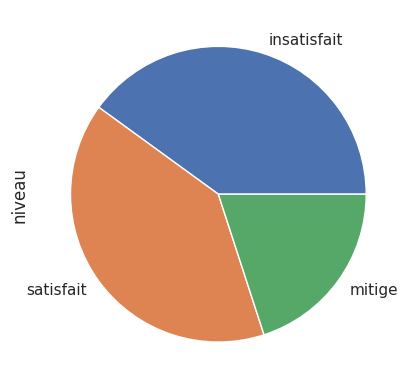

In [365]:
df_full['niveau'].value_counts().plot.pie()

In [373]:
df_full['niveau'].value_counts()

insatisfait    8000
satisfait      8000
mitige         4000
Name: niveau, dtype: int64

In [370]:
df_full[df_full['language']=='en']['mniveau'].value_counts()

insatisfait    4000
satisfait      4000
mitige         2000
Name: niveau, dtype: int64

In [412]:
#  Autre approche
df_full_2=df_full.copy()
df_fr=df_full[df_full['language']=='fr']
df_en=df_full[df_full['language']=='en']

In [413]:
a=df_fr[df_fr['niveau']=='satisfait'].groupby('stars').sample(1000)
b=df_fr[df_fr['niveau']=='insatisfait'].groupby('stars').sample(1000)

In [414]:
c=df_full[df_full['niveau']=='mitige']

In [415]:
d=df_en[df_en['niveau']=='satisfait'].groupby('stars').sample(1000)
e=df_en[df_en['niveau']=='insatisfait'].groupby('stars').sample(1000)

In [416]:
df_final=pd.concat([a,b,c,d,e])

In [417]:
df_final.shape


(12000, 5)

<Axes: xlabel='niveau', ylabel='count'>

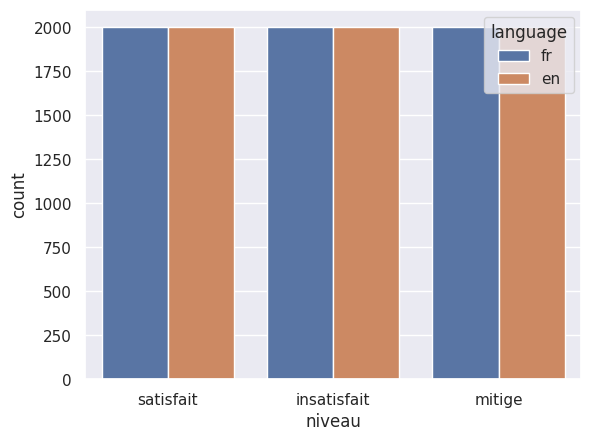

In [418]:
sns.countplot(data=df_final,x='niveau',hue="language")

<Axes: ylabel='niveau'>

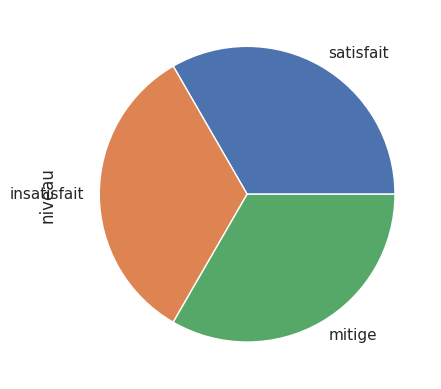

In [403]:
df_final['niveau'].value_counts().plot.pie()

In [405]:
df_final.to_csv('data_final.csv')

<Axes: xlabel='niveau', ylabel='count'>

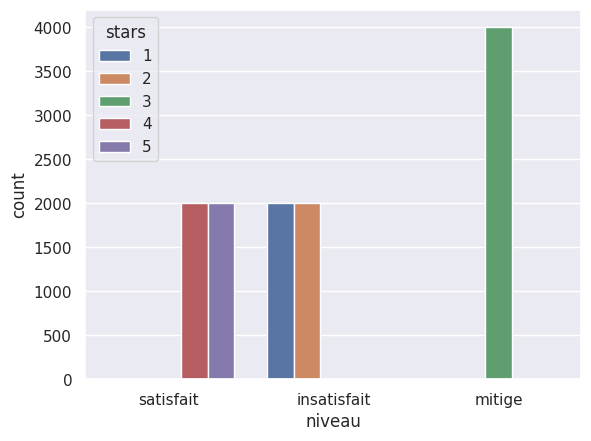

In [404]:
sns.countplot(data=df_final,x='niveau',hue="stars")

In [406]:
df_final.head(10)

,stars,review_body,review_title,niveau,language
157557,4,Après l’avoir commandé deux fois car la premiè...,Briquet Steam punk,satisfait,fr
125396,4,"Câble OK, emballage perfectible. En effet, l'e...","Câble OK, emballage perfectible",satisfait,fr
132516,4,"Très fonctionnel, mais un bémol en ce qui conc...",Mixeur/hachoir,satisfait,fr
126983,4,Livraison ponctuelle,Utile,satisfait,fr
144973,4,beau bateau playmobil pour mon fils de 4 ans (...,toute voiles dehors !,satisfait,fr
147964,4,1er essai de retrogaming pour moi j'ai voulu p...,Super pour du retrogaming mais uniquement avec...,satisfait,fr
125885,4,Très jolie mais pour les prénoms long difficil...,Très jolie posé sur table mais a voir sur le s...,satisfait,fr
156210,4,"Coque conforme à l'annonce, jolie et solide. D...",Très bien mais manque film protecteur,satisfait,fr
133158,4,Les aimants n'enlèvent pas le calcaire de l'ea...,aimants anti calcaire,satisfait,fr
156340,4,Élément de déco sur un mur.,C'est un élément de déco très joli et bien réa...,satisfait,fr


In [423]:
df_final['review_all']=df_final['review_title']+' '+df_final['review_body']

In [424]:
df_final

,stars,review_body,review_title,niveau,language,target,review_all
143119,4,La house est conforme à l'offre. Elle à été bi...,Bon produit,satisfait,fr,1,Bon produit La house est conforme à l'offre. E...
145657,4,Pour faire court le produit était mal fermé ma...,Très bon shampooing pour enlever les reflets j...,satisfait,fr,1,Très bon shampooing pour enlever les reflets j...
157590,4,bon produit qualité = au prix,utilisation facile,satisfait,fr,1,utilisation facile bon produit qualité = au prix
151657,4,Super rapport qualité/prix. Ce sont des pièces...,Satisfait,satisfait,fr,1,Satisfait Super rapport qualité/prix. Ce sont ...
124029,4,"Le colis a mis le temps pour venir, mais il es...",Maillot de sport 2 étoiles,satisfait,fr,1,Maillot de sport 2 étoiles Le colis a mis le t...
...,...,...,...,...,...,...,...
60925,2,I am disappointed with the Kona Grill Mat. It ...,Best Grill Mat???,insatisfait,en,-1,Best Grill Mat??? I am disappointed with the K...
45700,2,Lasted two months before strap holder broke - ...,Lasted Two Months,insatisfait,en,-1,Lasted Two Months Lasted two months before str...
69161,2,"Disappointed in these. The tips don't line up,...",Poor quality,insatisfait,en,-1,Poor quality Disappointed in these. The tips d...
71355,2,Battery charger lasted a day Poor construction,Two Stars,insatisfait,en,-1,Two Stars Battery charger lasted a day Poor co...


In [419]:
def assign_label(val):
  if val=='satisfait':
    return 1
  elif val=='mitige':
    return 0
  else:
    return -1

In [425]:
df_final['target']=df_final['niveau'].apply(lambda x:assign_label(x))

In [426]:
df_final

,stars,review_body,review_title,niveau,language,target,review_all
143119,4,La house est conforme à l'offre. Elle à été bi...,Bon produit,satisfait,fr,1,Bon produit La house est conforme à l'offre. E...
145657,4,Pour faire court le produit était mal fermé ma...,Très bon shampooing pour enlever les reflets j...,satisfait,fr,1,Très bon shampooing pour enlever les reflets j...
157590,4,bon produit qualité = au prix,utilisation facile,satisfait,fr,1,utilisation facile bon produit qualité = au prix
151657,4,Super rapport qualité/prix. Ce sont des pièces...,Satisfait,satisfait,fr,1,Satisfait Super rapport qualité/prix. Ce sont ...
124029,4,"Le colis a mis le temps pour venir, mais il es...",Maillot de sport 2 étoiles,satisfait,fr,1,Maillot de sport 2 étoiles Le colis a mis le t...
...,...,...,...,...,...,...,...
60925,2,I am disappointed with the Kona Grill Mat. It ...,Best Grill Mat???,insatisfait,en,-1,Best Grill Mat??? I am disappointed with the K...
45700,2,Lasted two months before strap holder broke - ...,Lasted Two Months,insatisfait,en,-1,Lasted Two Months Lasted two months before str...
69161,2,"Disappointed in these. The tips don't line up,...",Poor quality,insatisfait,en,-1,Poor quality Disappointed in these. The tips d...
71355,2,Battery charger lasted a day Poor construction,Two Stars,insatisfait,en,-1,Two Stars Battery charger lasted a day Poor co...


### Assignation

- (-1) ----> Insatisfait
- (0)  -----> Mitigé
-  (1) ------> Satisfait

In [428]:
df_final.to_csv('dataset_final_all.csv')